In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data processing libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# libraries for model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# libraries for evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
import random

# presets
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
# define function to spit out description of the feature
def feat_info(col_name):
    print(df_info.loc[col_name]['Description'])
    
# function to extract integer
def extract_integer(df):
    integers = []
    for entry in df:
        [integers.append(i) for i in entry.split() if i.isdigit()]
    return(integers)

# function to extract state from address
def get_state(col):
    state = []
    for address in col:
        state.append(address.split(' ')[-2])
    return(state)

In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.info()

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Missing data

In [9]:
# missing data
perc_mis = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
perc_mis

mort_acc                0.095435
emp_title               0.057892
emp_length              0.046211
title                   0.004431
pub_rec_bankruptcies    0.001351
revol_util              0.000697
address                 0.000000
verification_status     0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
purpose                 0.000000
issue_d                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

In [10]:
# get features that have missing values
mis_col = [col for col in df.columns if df[col].isnull().sum() > 0]
mis_col

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'mort_acc',
 'pub_rec_bankruptcies']

`emp_title`

In [11]:
df['emp_title'].value_counts(dropna=False)
df['emp_title'].nunique()

173105

In [12]:
# we see that all the categories are close to being evenly distributed
df['emp_title'].value_counts(dropna=False) / df.shape[0]

NaN                                   0.057892
Teacher                               0.011082
Manager                               0.010732
Registered Nurse                      0.004687
RN                                    0.004661
                                        ...   
 VA North Texas Health Care System    0.000003
Jersey Shore Steel Co.                0.000003
Pumper Supervisor                     0.000003
China Grill Management                0.000003
survey staff                          0.000003
Name: emp_title, Length: 173106, dtype: float64

In [13]:
df = df.drop('emp_title',axis=1)

`emp_length`

In [14]:
# convert strings to integers
# replace missing value with the mode
df['emp_length'] = df['emp_length'].replace(value='10 years',to_replace='10+ years')
mode = df['emp_length'].value_counts(dropna=False).index[0]
df['emp_length'] = df['emp_length'].fillna(value=mode)
df['emp_length'] = list(map(int,extract_integer(df['emp_length'])))

In [15]:
# note 10 means more than 10 years of experience
df['emp_length'].value_counts()

10    144342
1      57607
2      35827
3      31665
5      26495
4      23952
6      20841
7      20819
8      19168
9      15314
Name: emp_length, dtype: int64

`title`

In [16]:
# Drop title column
df = df.drop('title',axis=1)

`revol_util`

In [17]:
df['revol_util'].value_counts(dropna=False).head(5)

0.0     2213
53.0     752
60.0     739
61.0     734
55.0     730
Name: revol_util, dtype: int64

In [18]:
# fill missing values with the mean
mean = round(df['revol_util'].mean())
df['revol_util'] = df['revol_util'].fillna(mean)

`mort_acc`

In [19]:
df['mort_acc'].value_counts(dropna=False).head(5)

0.0    139777
1.0     60416
2.0     49948
3.0     38049
NaN     37795
Name: mort_acc, dtype: int64

In [20]:
# fill missing values with the mean
mean = round(df['mort_acc'].mean())
df['mort_acc'] = df['mort_acc'].fillna(mean)

`pub_rec_bankruptcies`

In [21]:
df['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
# fill missing values with 0.0
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0.0)

Now we've got rid of all the missing values!

In [23]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [24]:
df.shape

(396030, 25)

## EDA

#### Distribution for `loan_status`

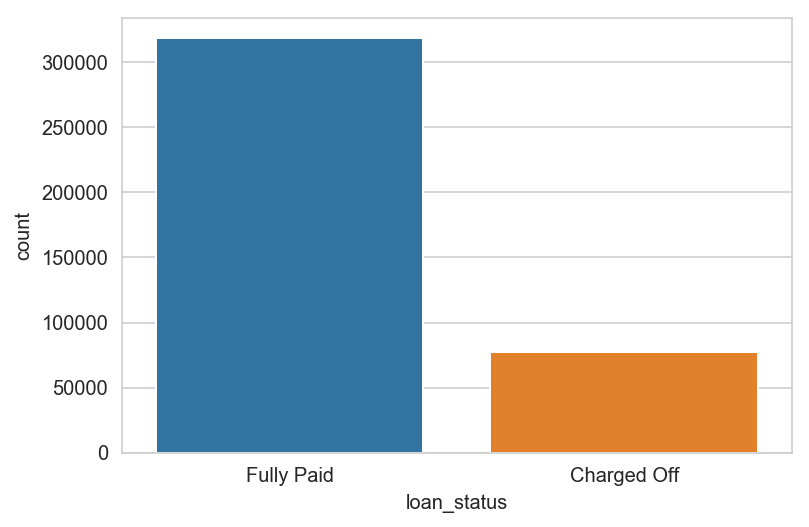

In [25]:
# distribution of the target distribution
sns.countplot(df['loan_status']);

Looks like there is some discrepancy between the number of `Charged Off` and `Fully Paid`, i.e. majority of the loans were paid back.

#### Distributions of `loan_amnt` in terms of `Fully Paid` vs. `Charged Off`.

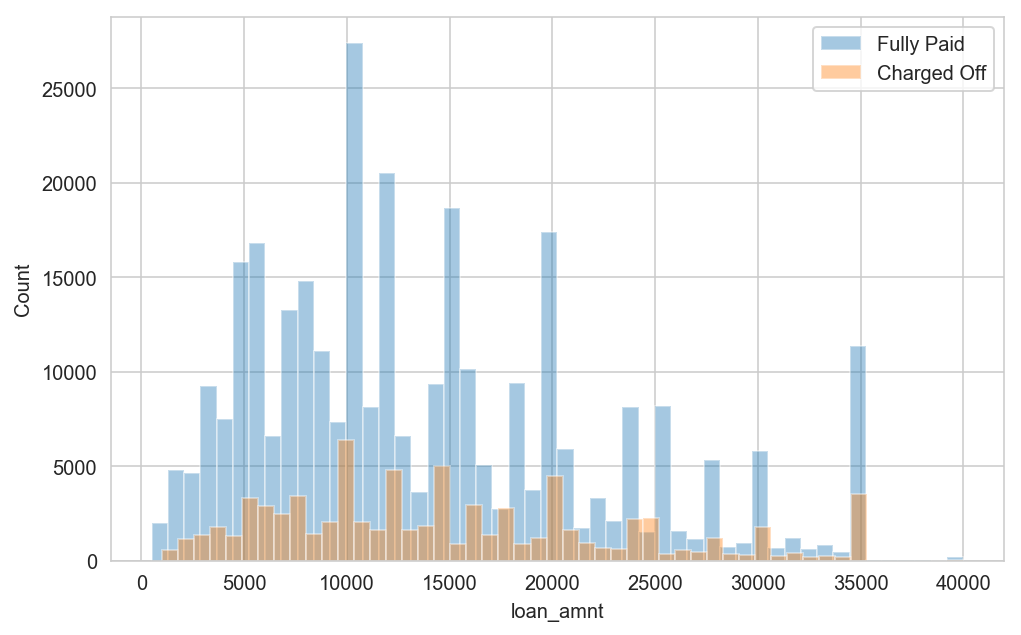

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(df[(df['loan_status']=='Fully Paid')]['loan_amnt'],kde=False,bins=50)
sns.distplot(df[(df['loan_status']=='Charged Off')]['loan_amnt'],kde=False,bins=50)
plt.ylabel('Count')
plt.legend(['Fully Paid','Charged Off']);

As the loan amount increases, we see less people borrowing money in general.

#### `loan_status` count in terms of `Fully Paid` vs. `Charged Off`

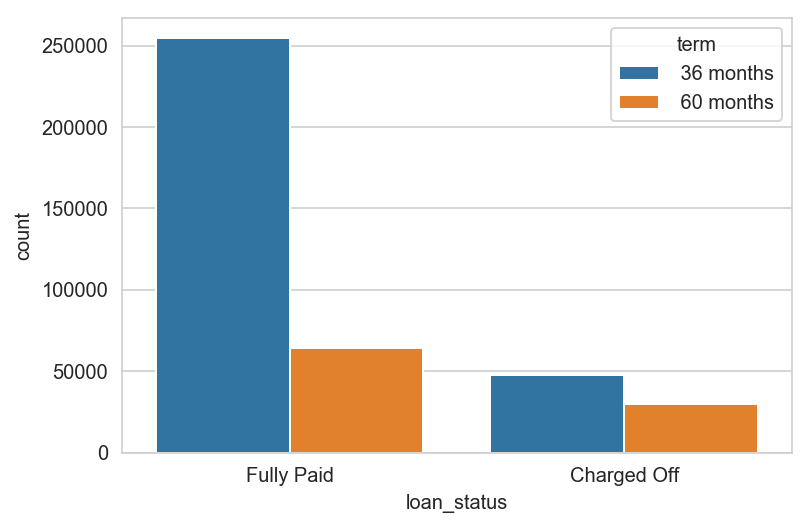

In [27]:
sns.countplot(x='loan_status',data=df, hue='term');

There is a high discrepancy between the number of terms `36 months` and `60 months` for `Fully Paid` and low discrepancy for `Charged Off`.

#### Distribution of `int_rate` in terms of `Fully Paid` vs. `Charged Off`

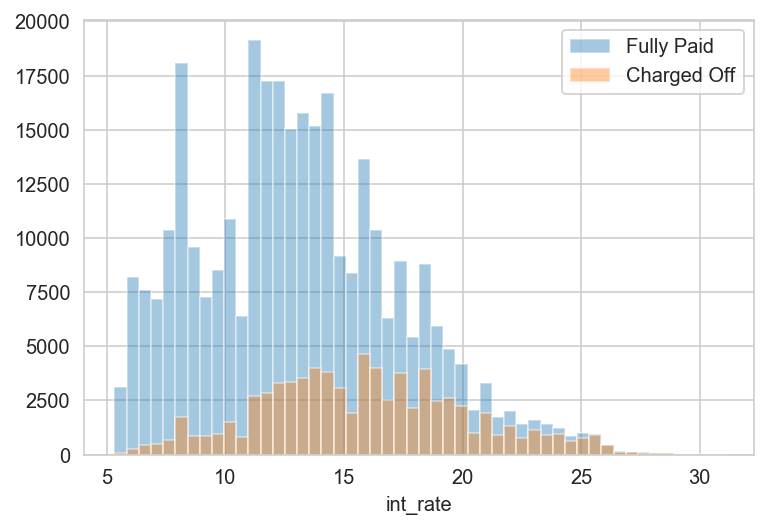

In [28]:
sns.distplot(df[df['loan_status']=='Fully Paid']['int_rate'], kde=False)
sns.distplot(df[df['loan_status']=='Charged Off']['int_rate'], kde=False)
plt.legend(['Fully Paid','Charged Off']);

Most of the loans that were `Fully Paid` had interest rates ranging from 5 to 20%. On the other hand for loans that were `Charged Off`, interest rate were spread out between 5% to 27%. Distribution looks somewhat like a normal distribution.

#### Distribution of `installment` in terms of `Fully Paid` vs. `Charged Off`

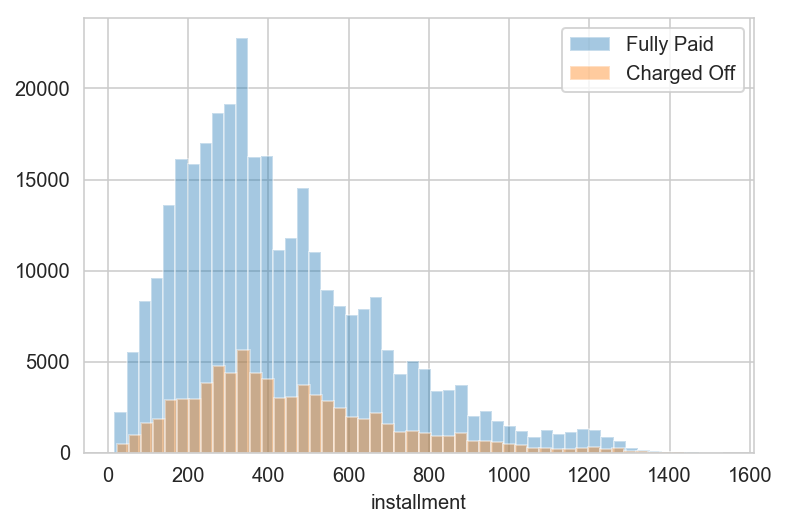

In [29]:
sns.distplot(df[df['loan_status']=='Fully Paid']['installment'],kde=False)
sns.distplot(df[df['loan_status']=='Charged Off']['installment'],kde=False)
plt.legend(['Fully Paid','Charged Off']);

Similar trend for `Fully Paid` and `Charged Off`.

#### `grade` Counts

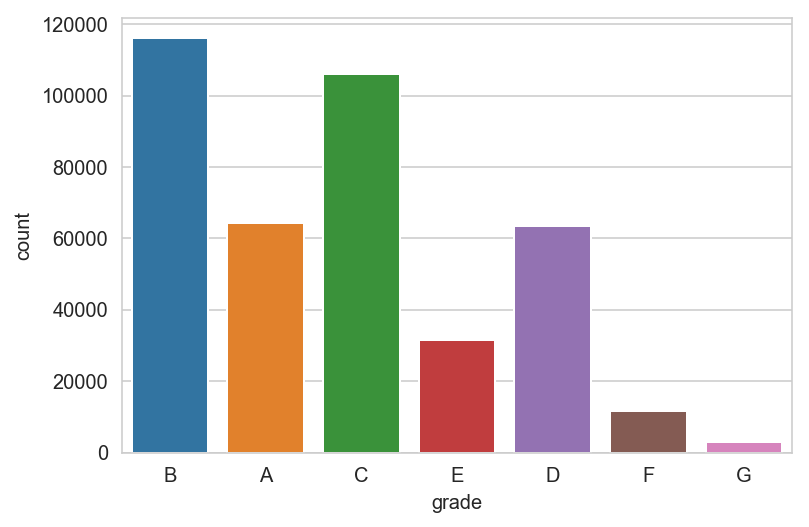

In [30]:
sns.countplot(df['grade'])

#### `sub_grade` Counts

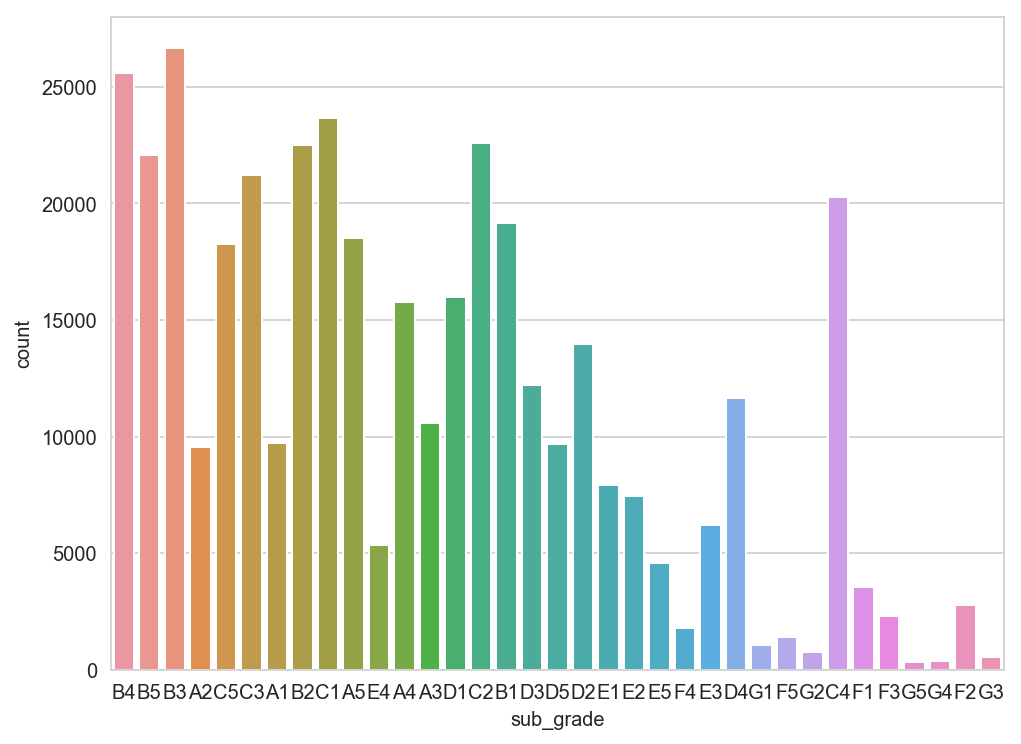

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(df['sub_grade'])

#### `emp_length` in terms of `Fully Paid` vs. `Charged Off`

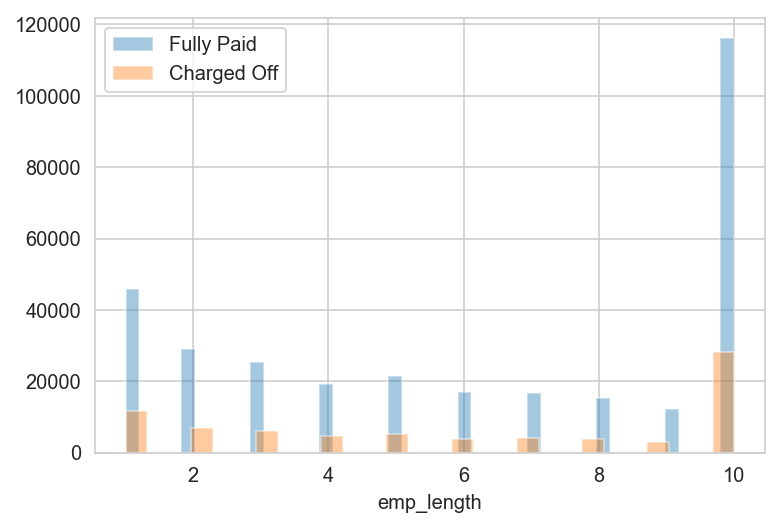

In [32]:
sns.distplot(df[df['loan_status']=='Fully Paid']['emp_length'],kde=False)
sns.distplot(df[df['loan_status']=='Charged Off']['emp_length'],kde=False)
plt.legend(['Fully Paid','Charged Off']);

Most of people had more than 10 years of employment length.

#### `home_ownership` in terms of `Fully Paid` vs. `Charged Off`

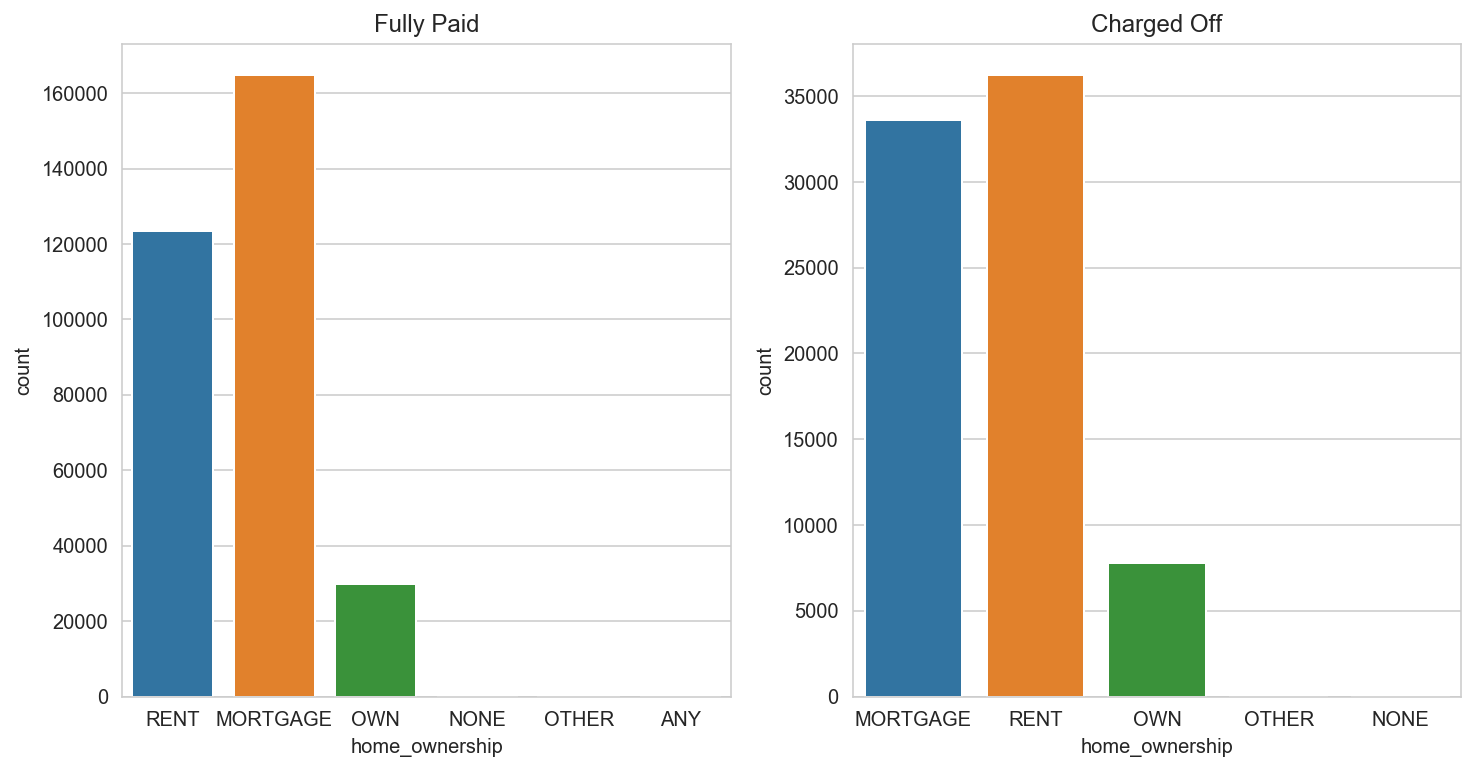

In [33]:
plt.figure(figsize=(12,6))
g = plt.subplot(1,2,1)
g = sns.countplot(df[df['loan_status']=='Fully Paid']['home_ownership'])
g.set_title('Fully Paid')
g2 = plt.subplot(1,2,2)
g2 = sns.countplot(df[df['loan_status']=='Charged Off']['home_ownership'])
g2.set_title('Charged Off');

We do not see much difference in the trends between `Fully Paid` and `Charged Off` for `home_ownership`.

#### `annual_inc` in terms of `Fully Paid` vs. `Charged Off`

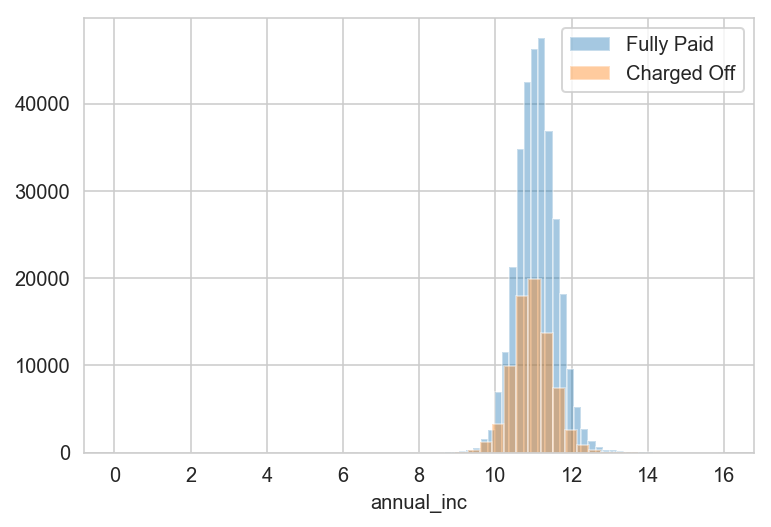

In [34]:
# log(1+x) of annual income
sns.distplot(np.log1p(df[df['loan_status']=='Fully Paid']['annual_inc']),kde=False)
sns.distplot(np.log1p(df[df['loan_status']=='Charged Off']['annual_inc']),kde=False)
plt.legend(['Fully Paid','Charged Off']);

We see that the distribution are similar.

#### `verification_status` count

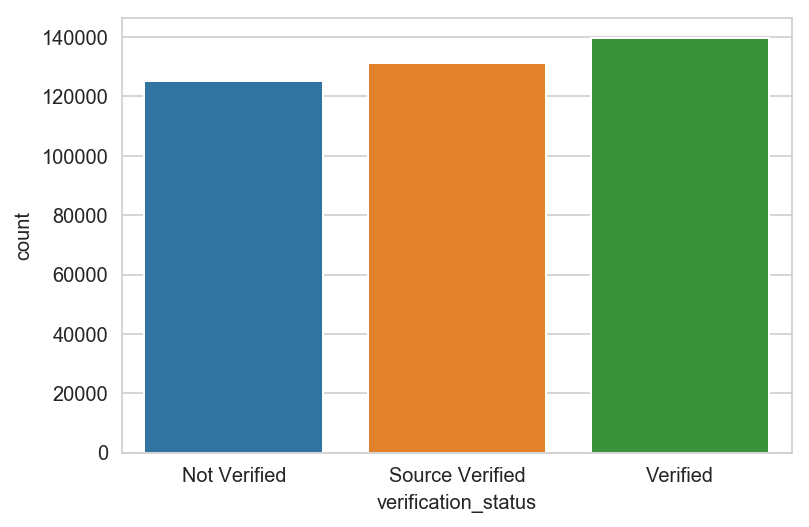

In [35]:
sns.countplot(df['verification_status'])

#### `verification_status` in terms of `Fully Paid` and `Charged Off`

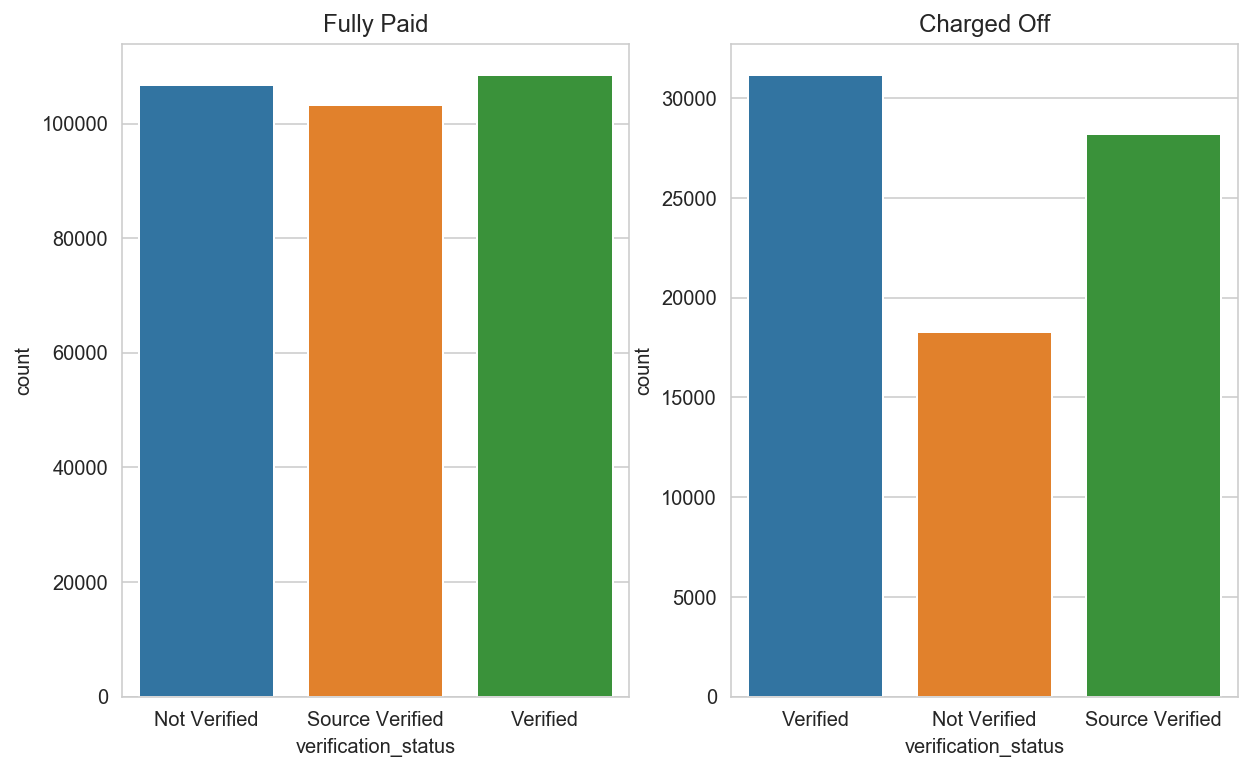

In [36]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
g1 = sns.countplot(df[df['loan_status']=='Fully Paid']['verification_status'])
g1.set_title('Fully Paid')

plt.subplot(1,2,2)
g2 = sns.countplot(df[df['loan_status']=='Charged Off']['verification_status'])
g2.set_title('Charged Off');

Wee see that `Not Verified` counts were lower compared to the othe two for `Charged Off`

#### `issue_d` counts

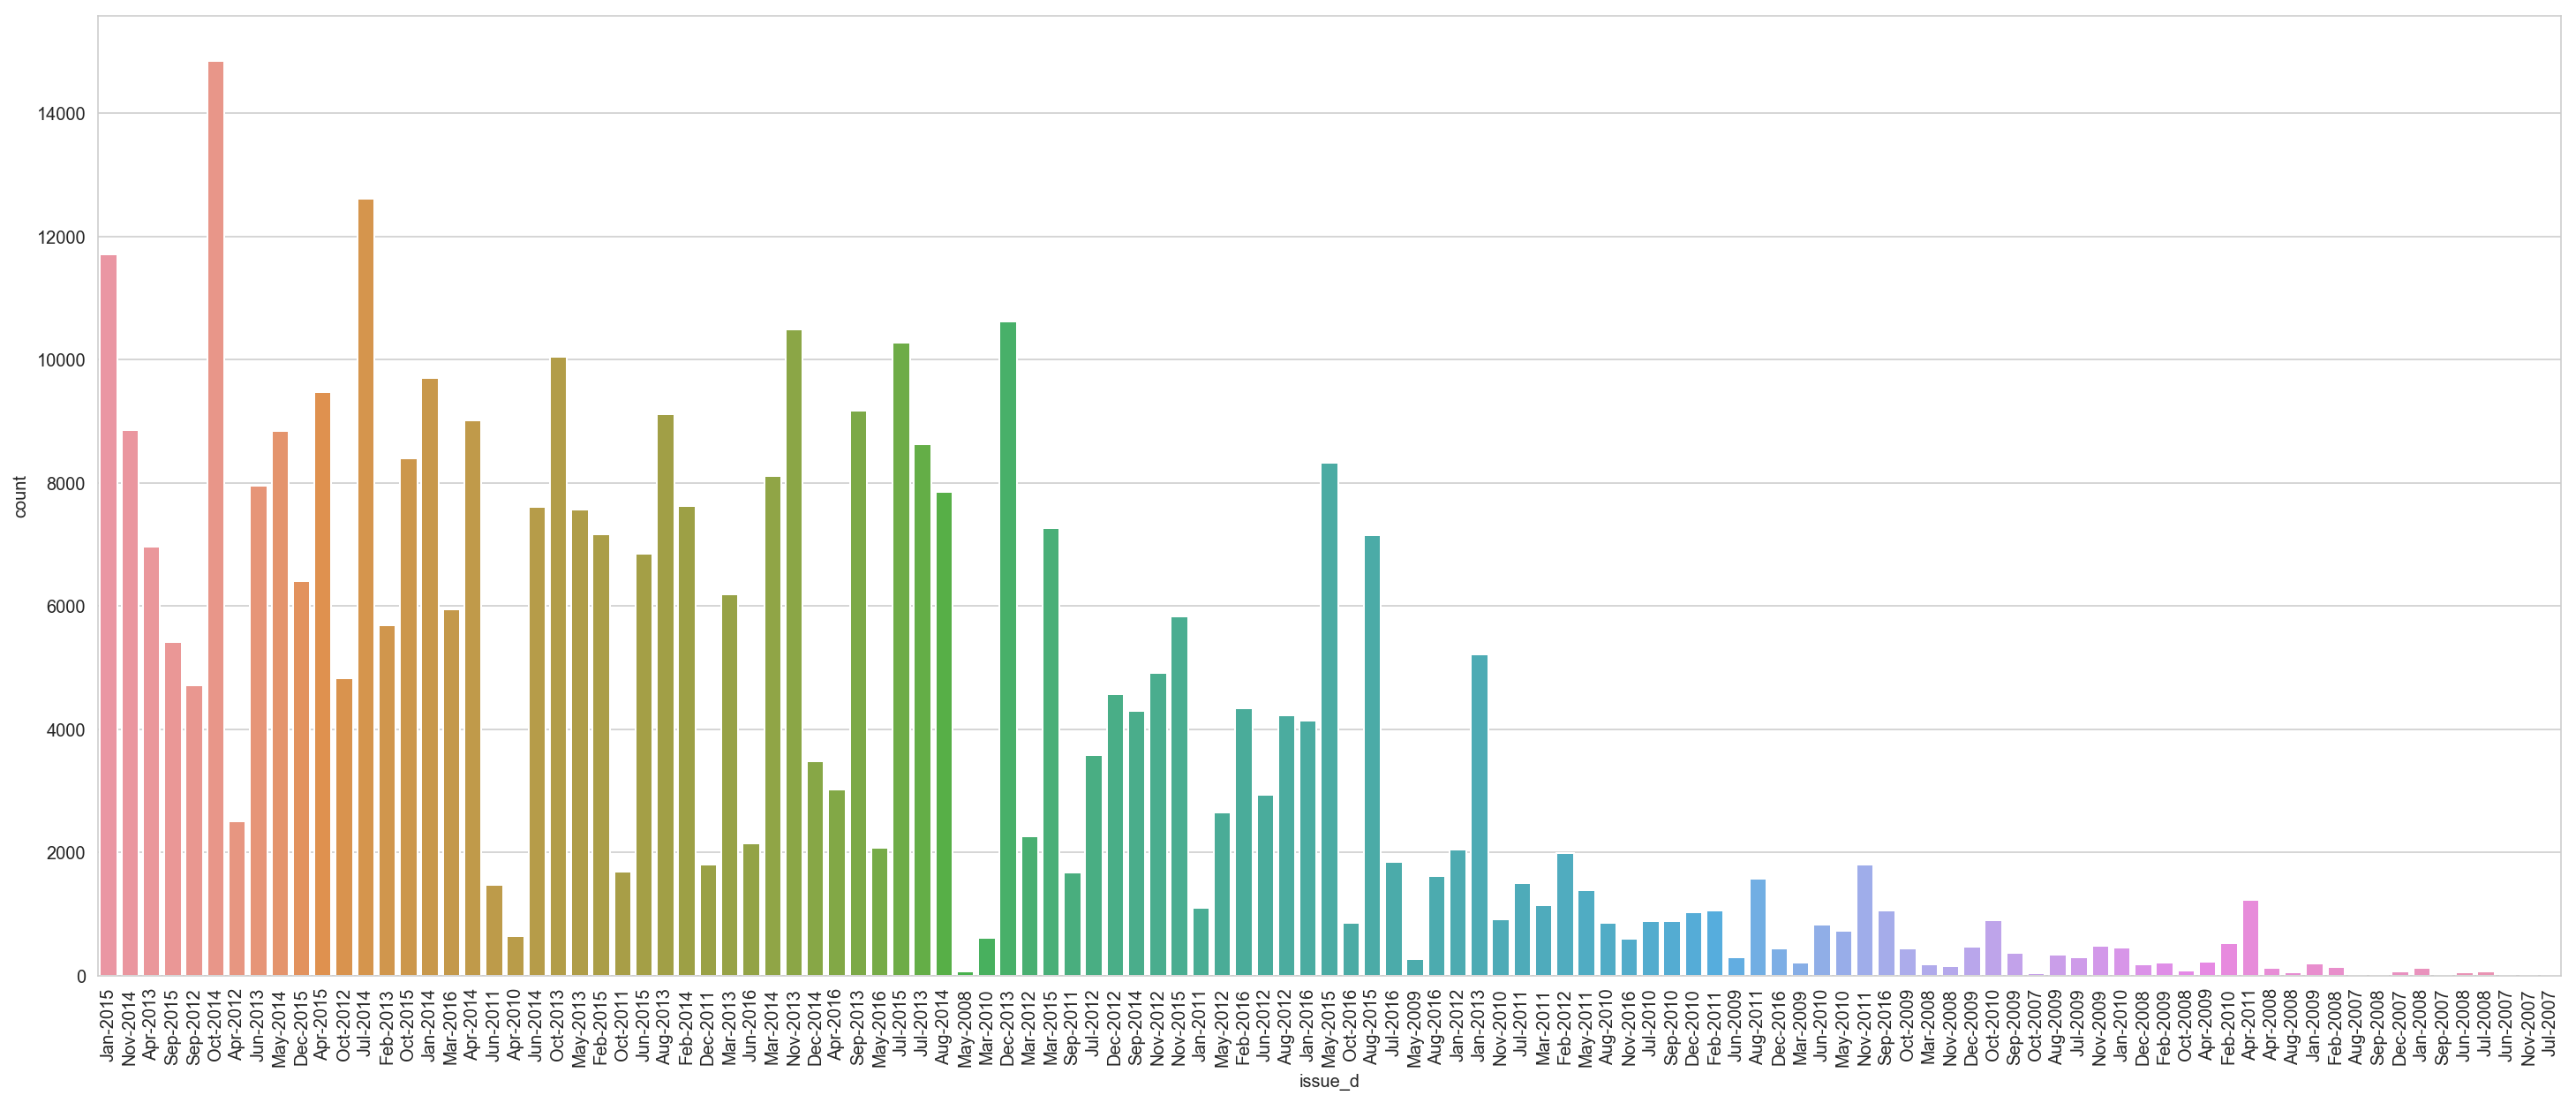

In [37]:
plt.figure(figsize=(25,10))
sns.countplot(df['issue_d'])
plt.xticks(rotation=90);

#### `purpose` count

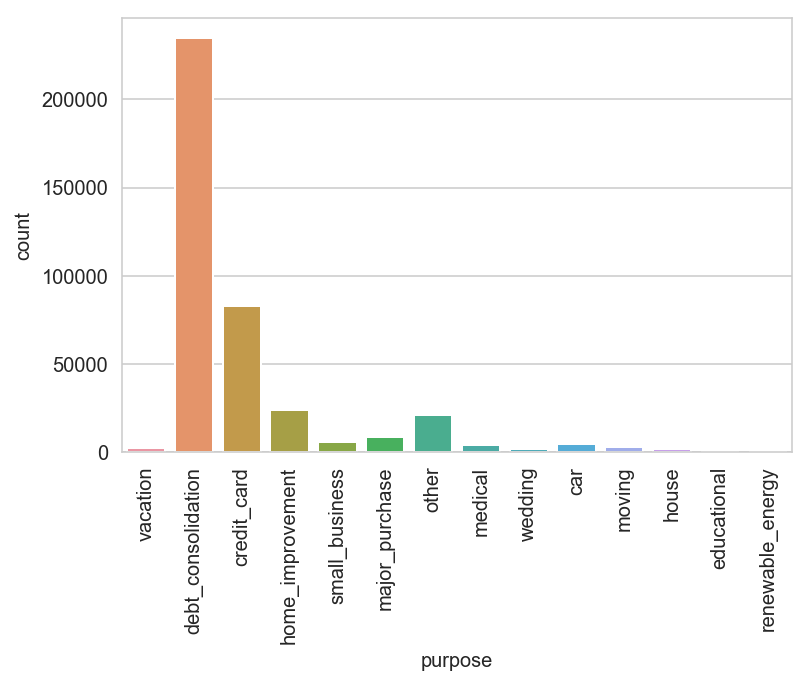

In [38]:
sns.countplot(df['purpose'])
plt.xticks(rotation=90);

#### `purpose` in terms of `Fully Paid` and `Charged Off`

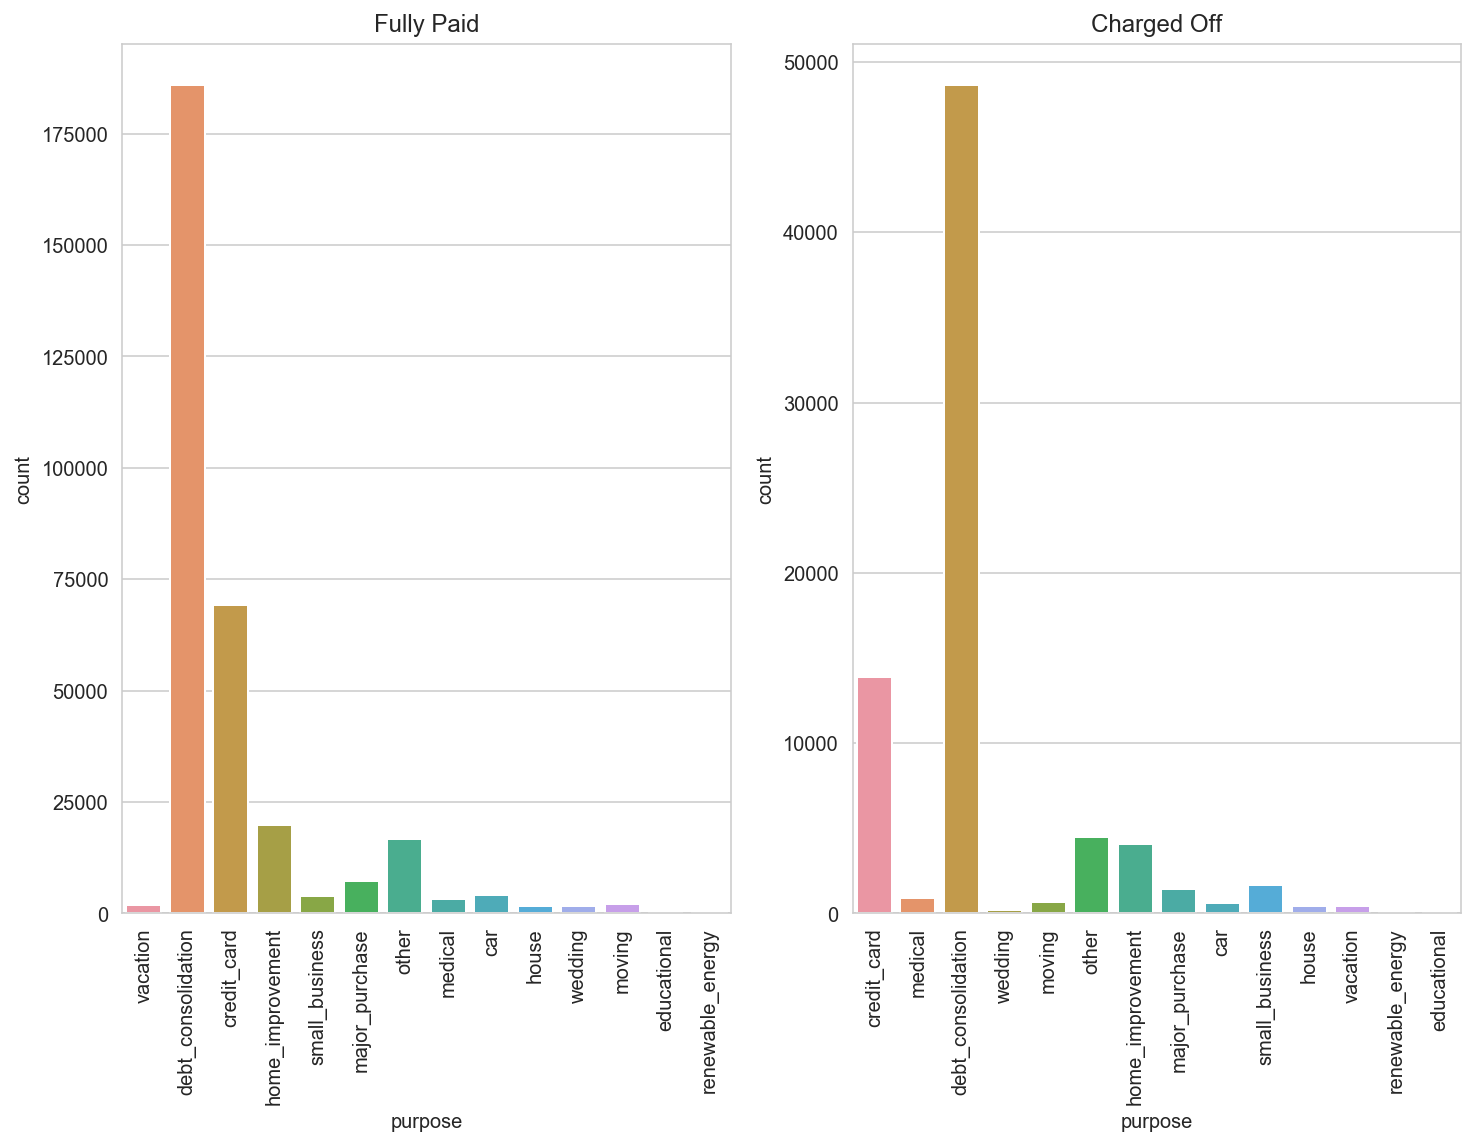

In [39]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
g = sns.countplot(df[df['loan_status']=='Fully Paid']['purpose'])
g.set_title('Fully Paid')
plt.xticks(rotation=90);

plt.subplot(1,2,2)
g1 = sns.countplot(df[df['loan_status']=='Charged Off']['purpose'])
g1.set_title('Charged Off')
plt.xticks(rotation=90);

We can see a similar trend for both `Fully Paid` and `Charged Off`.

#### `dti` < 40 in terms of `Fully Paid` and `Charged Off`

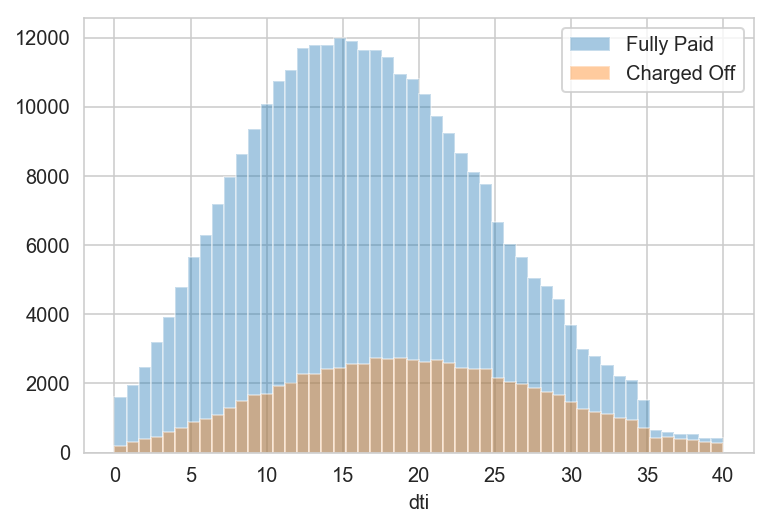

In [40]:
# distribution of dti < 40
sns.distplot(df[(df['dti']<40)&(df['loan_status']=='Fully Paid')]['dti'],kde=False)
sns.distplot(df[(df['dti']<40)&(df['loan_status']=='Charged Off')]['dti'],kde=False)
plt.legend(['Fully Paid','Charged Off']);

We see that the general trend is similar but the peak values differ by about 5 units.

#### `open_acc` count

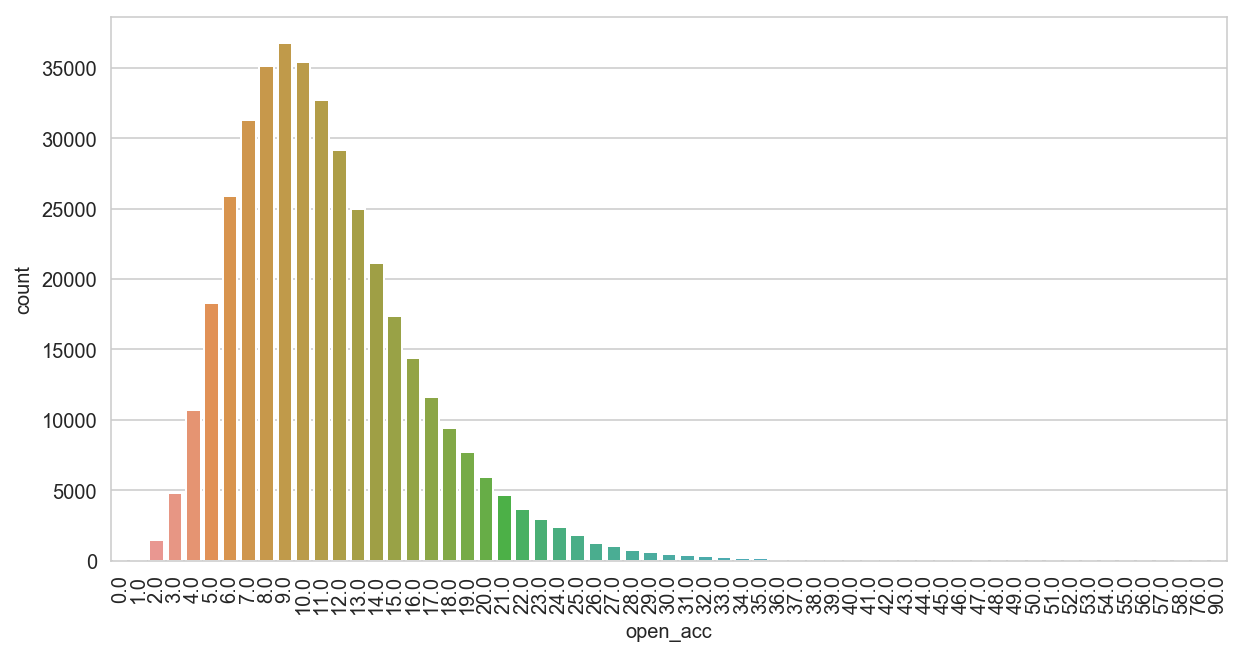

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df['open_acc'])
plt.xticks(rotation=90);

`pub_rec` counts

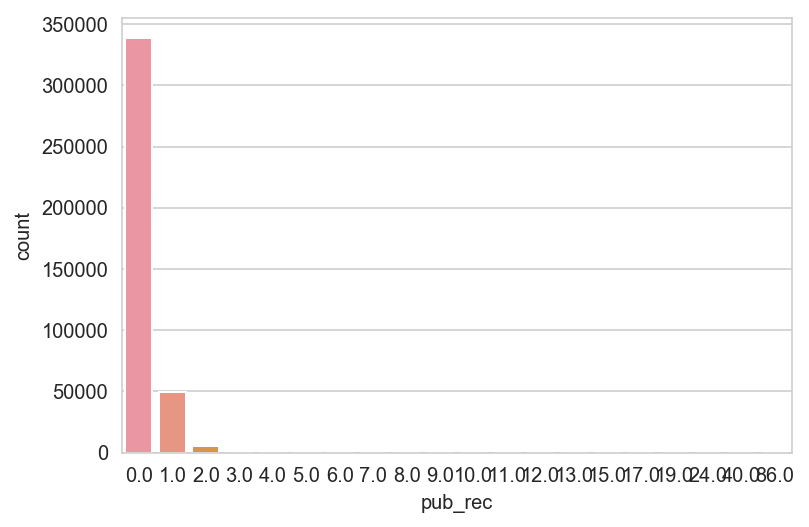

In [42]:
sns.countplot(df['pub_rec']);

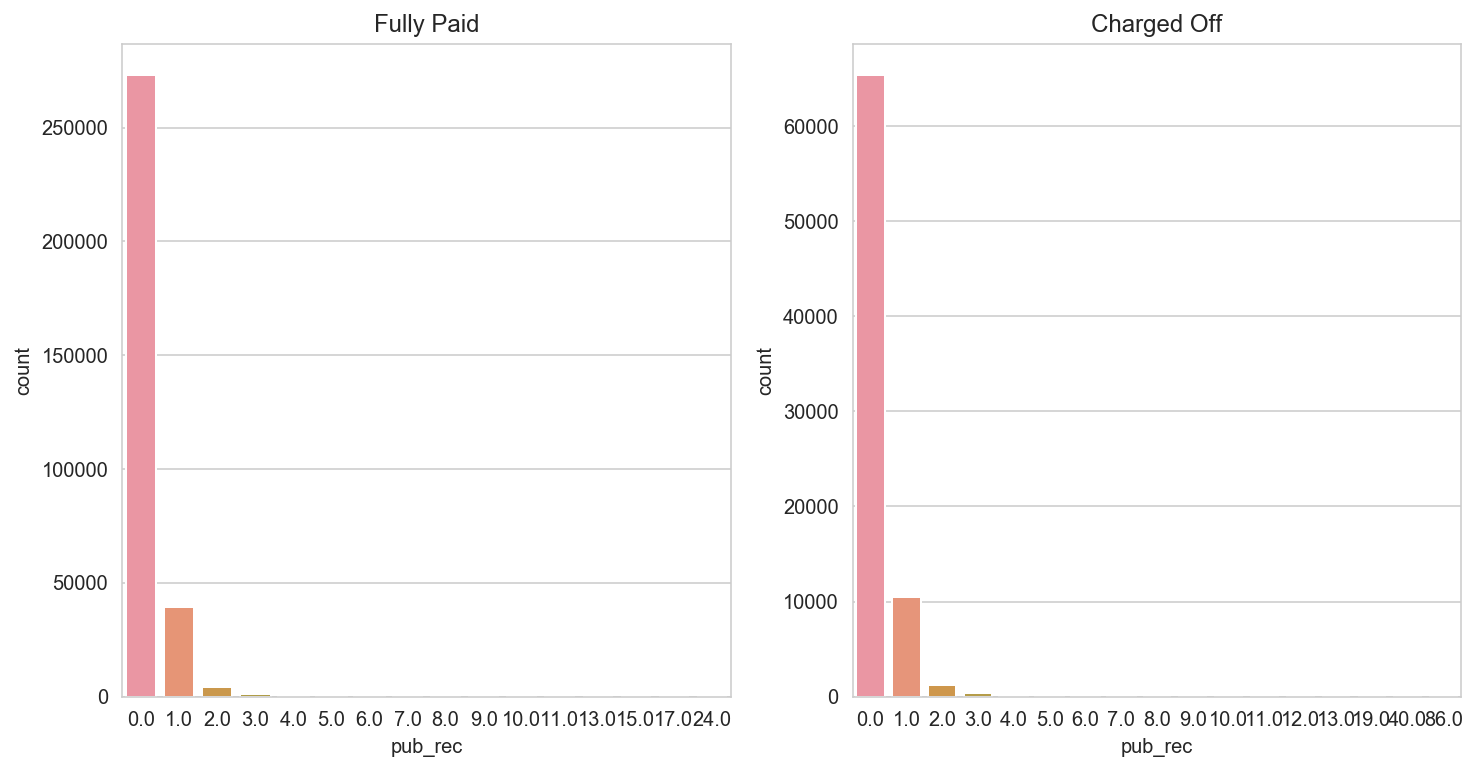

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g = sns.countplot(df[df['loan_status']=='Fully Paid']['pub_rec'])
g.set_title('Fully Paid')

plt.subplot(1,2,2)
g1 = sns.countplot(df[df['loan_status']=='Charged Off']['pub_rec'])
g1.set_title('Charged Off');

Distribution are similar for both `Fully Paid` and `Charged Off`.

#### `revol_bal` < 200,000 distribution 

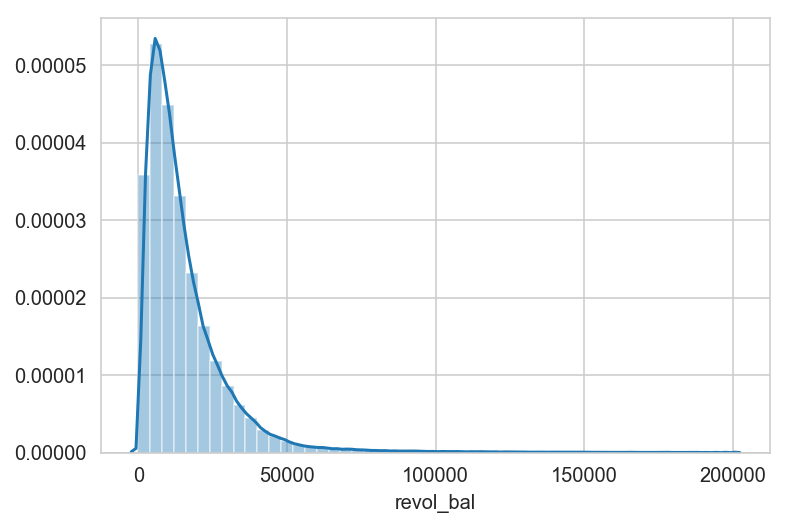

In [44]:
# get revol_bal < 200,000 getting rid of outliers
sns.distplot(df[df['revol_bal']<200000]['revol_bal'])

#### `revol_bal` < 200,000 in terms of `Fully Paid` and `Charged Off`.

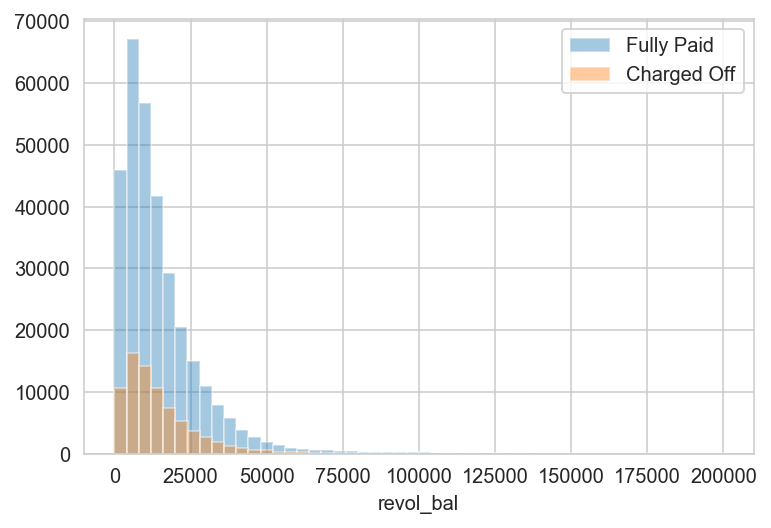

In [45]:
sns.distplot(df[(df['revol_bal']<200000)&(df['loan_status']=='Fully Paid')]['revol_bal'],kde=False)
sns.distplot(df[(df['revol_bal']<200000)&(df['loan_status']=='Charged Off')]['revol_bal'],kde=False)
plt.legend(['Fully Paid','Charged Off']);

#### Distribution of `revol_util` < 200

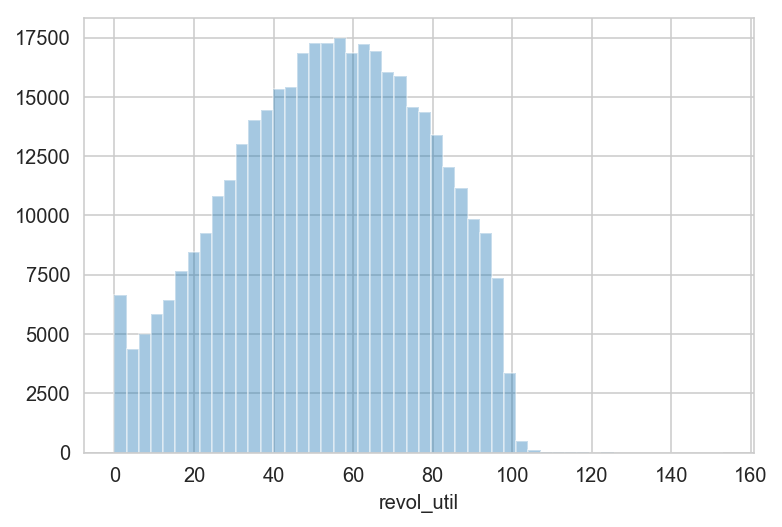

In [46]:
# revol_util < 200
sns.distplot(df[df['revol_util']<200]['revol_util'], kde=False)

#### Distributions of `revol_util` < 200 in terms of `Fully Paid` and `Charged Off`.

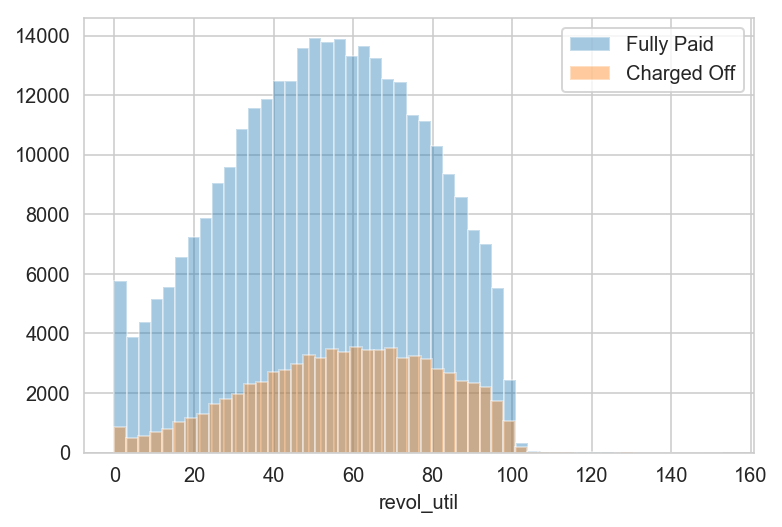

In [47]:
sns.distplot(df[(df['revol_util']<200)&(df['loan_status']=='Fully Paid')]['revol_util'], kde=False)
sns.distplot(df[(df['revol_util']<200)&(df['loan_status']=='Charged Off')]['revol_util'], kde=False)
plt.legend(['Fully Paid','Charged Off']);

#### Distribution of `total_acc` in terms of `Fully Paid` and `Charged Off`.

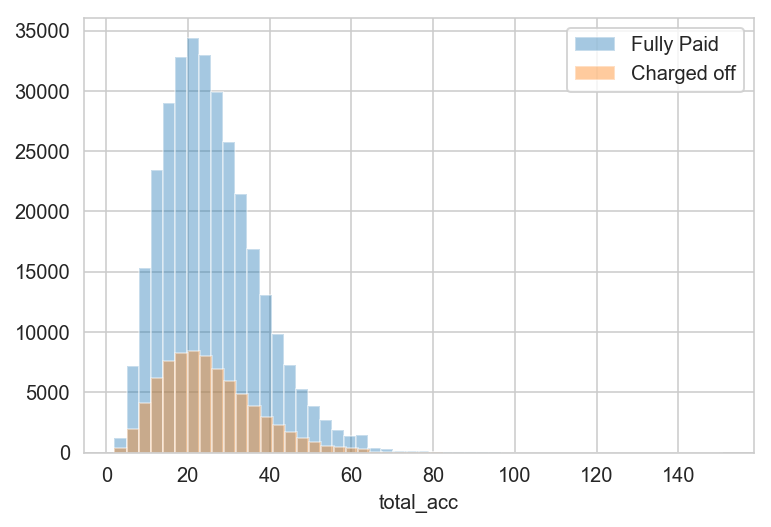

In [48]:
sns.distplot(df[(df['total_acc']> 0)&(df['loan_status']=='Fully Paid')]['total_acc'], kde=False)
sns.distplot(df[(df['total_acc']> 0)&(df['loan_status']=='Charged Off')]['total_acc'], kde=False)
plt.legend(['Fully Paid','Charged off']);

#### Count of `initial_list_status` by `Fully Paid` and `Charged off`.

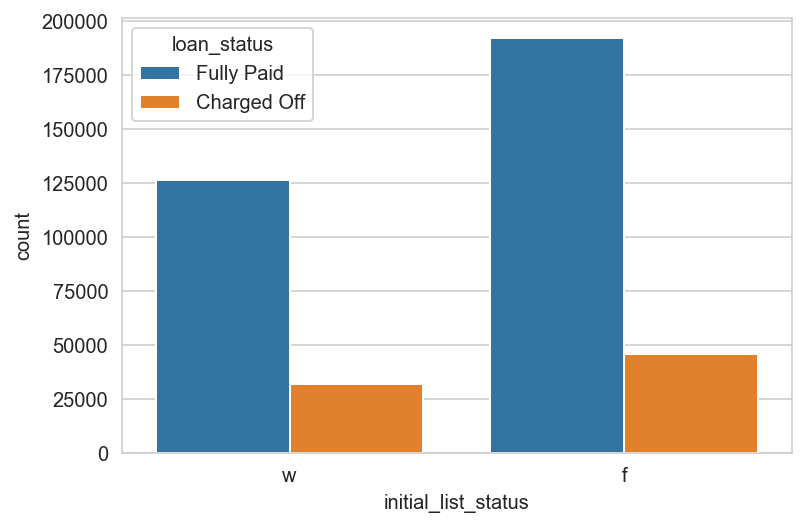

In [49]:
sns.countplot(x='initial_list_status',data=df,hue='loan_status');

#### Count of `application type` by `Fully Paid` and `Charged Off`

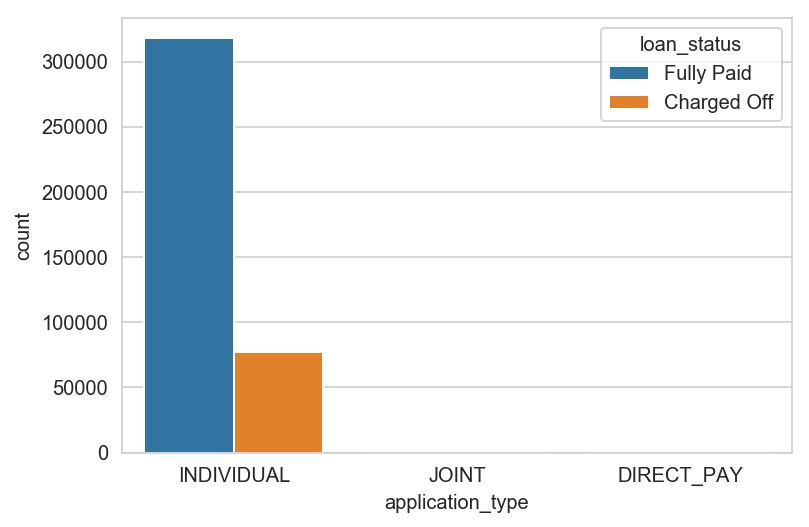

In [50]:
sns.countplot(x='application_type',data=df,hue='loan_status');

Invididual dominates the rest of the categories.

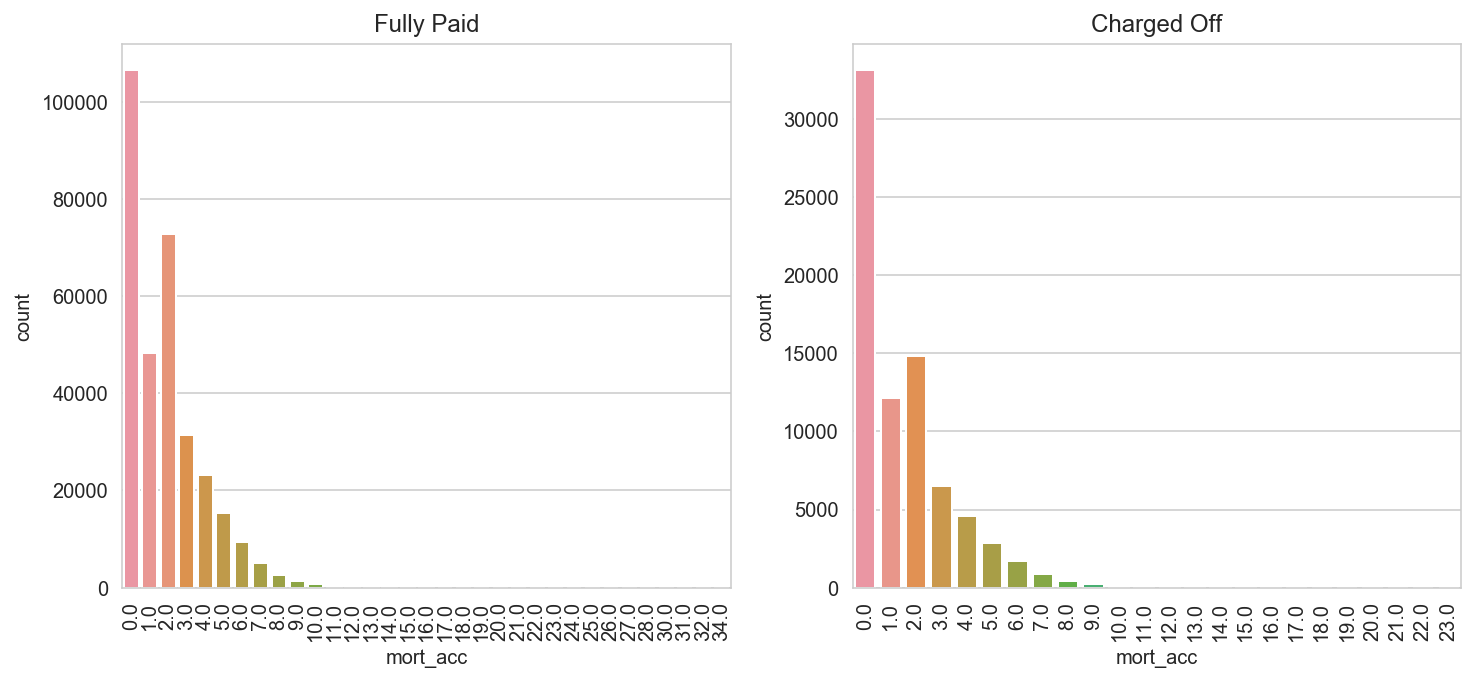

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
g1 = sns.countplot(df[df['loan_status']=='Fully Paid']['mort_acc'])
g1.set_title('Fully Paid')
plt.xticks(rotation=90);

plt.subplot(1,2,2)
g2 = sns.countplot(df[df['loan_status']=='Charged Off']['mort_acc'])
g2.set_title('Charged Off')
plt.xticks(rotation=90);

We see similar trends between `Fully Paid` and `Charged Off`.

#### Count for `pub_rec_bankruptcies`

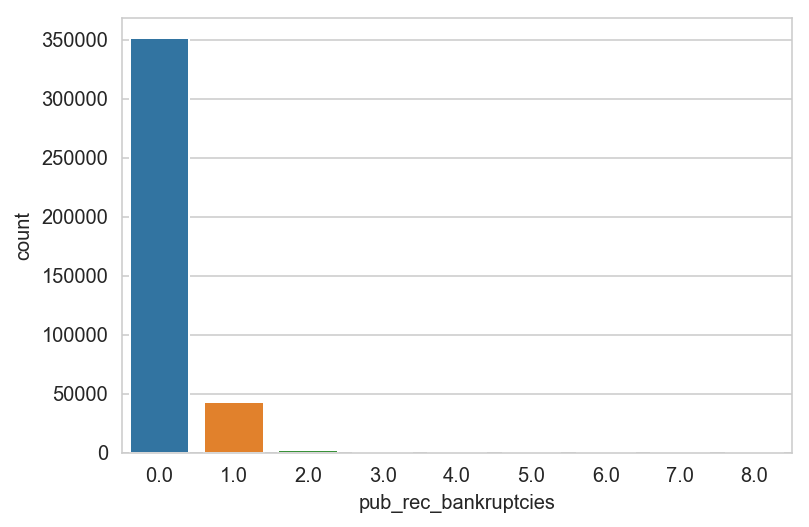

In [52]:
sns.countplot(df['pub_rec_bankruptcies'])

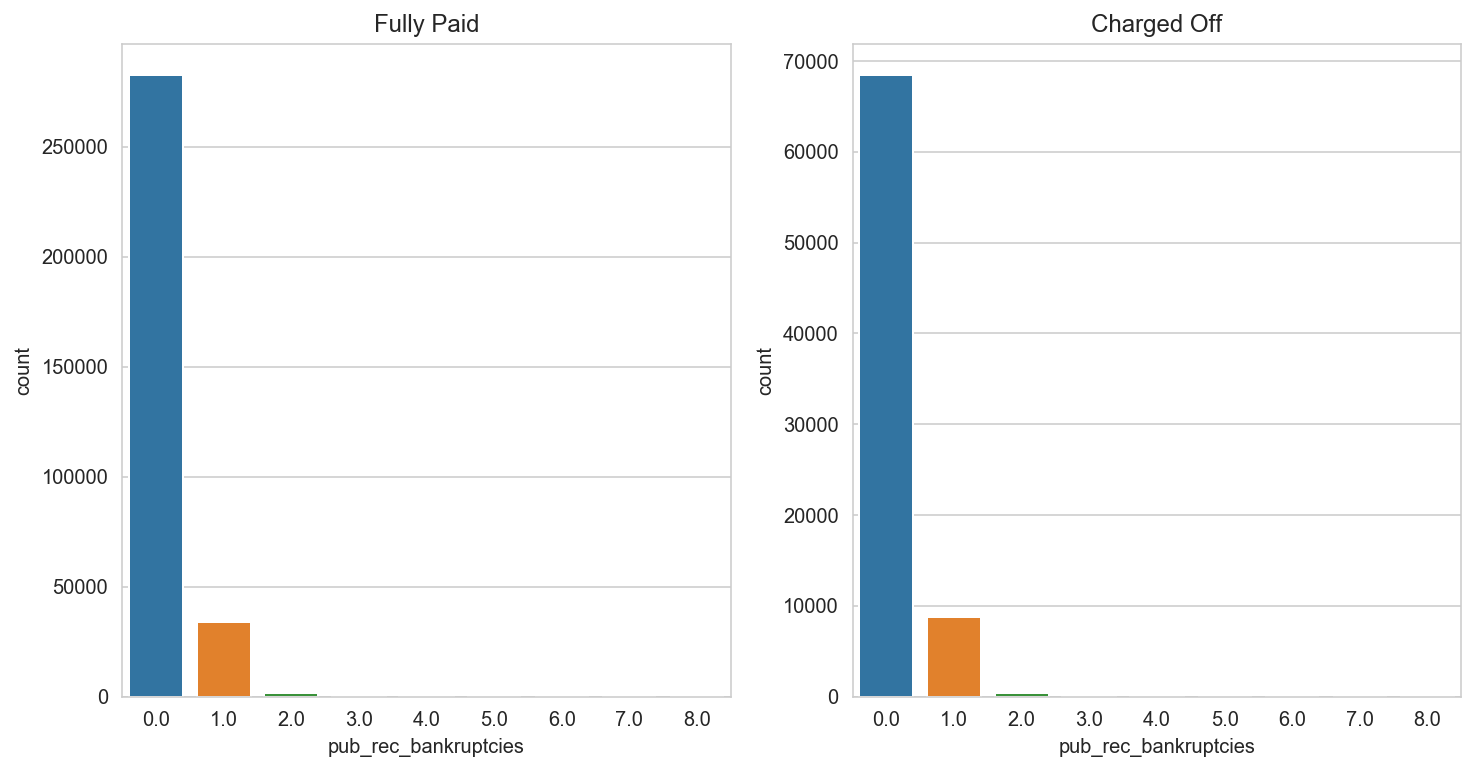

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g = sns.countplot(df[df['loan_status']=='Fully Paid']['pub_rec_bankruptcies'])
g.set_title('Fully Paid')

plt.subplot(1,2,2)
g1 = sns.countplot(df[df['loan_status']=='Charged Off']['pub_rec_bankruptcies'])
g1.set_title('Charged Off');

We see similar patterns

#### Add `state` column

In [54]:
df['state'] = get_state(df['address'])

#### Count for `state`

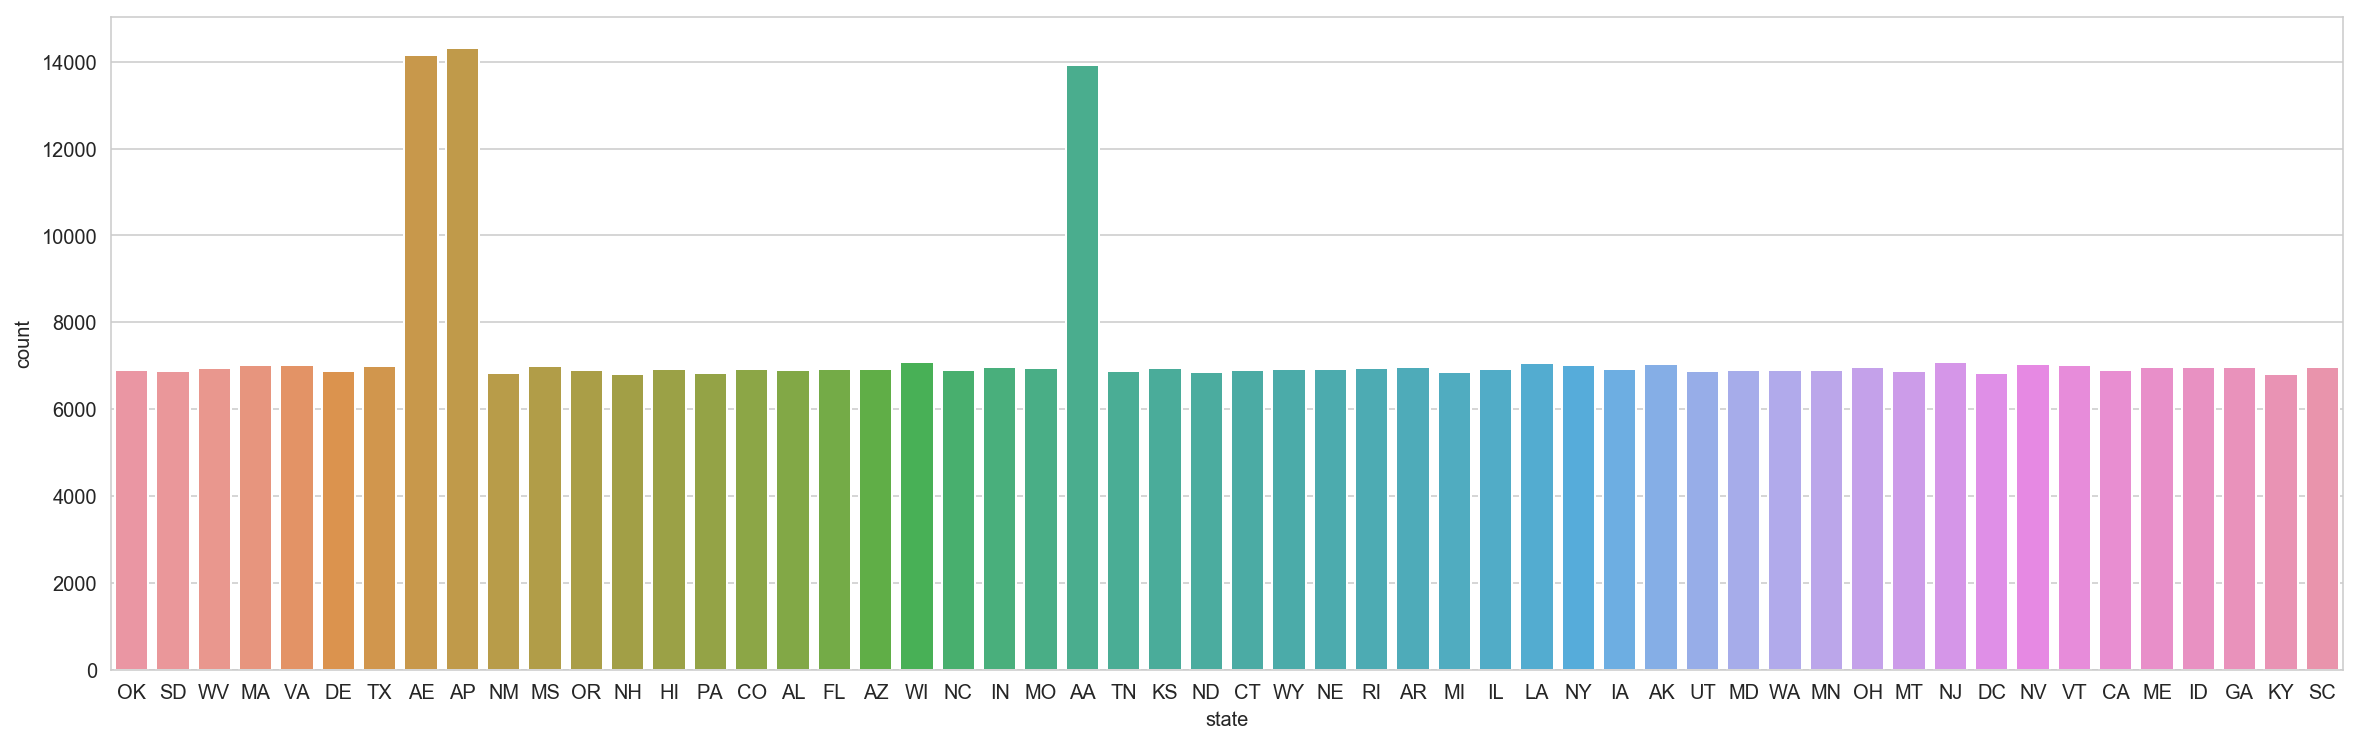

In [55]:
plt.figure(figsize=(20,6))
sns.countplot(df['state'])

In [56]:
# transform loan_status to binary 
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status'])

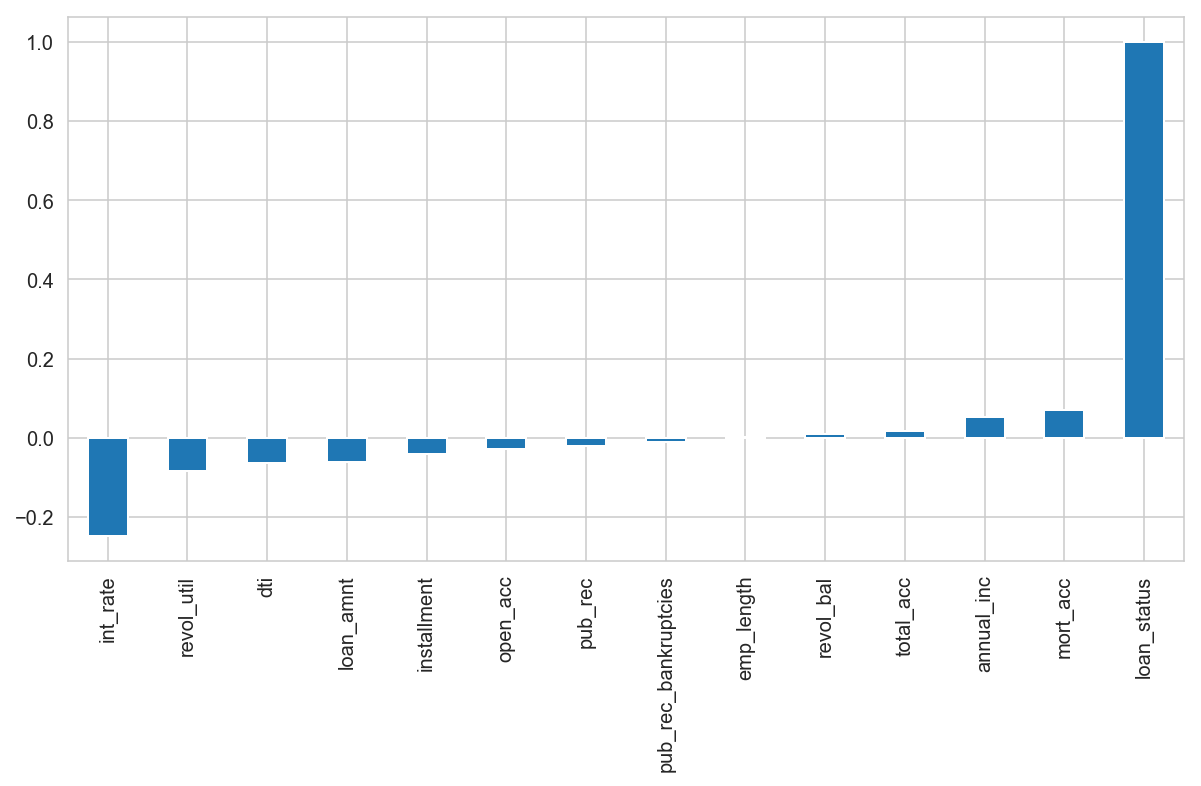

In [57]:
df.corr()['loan_status'].sort_values().plot(kind='bar',figsize=(10,5))

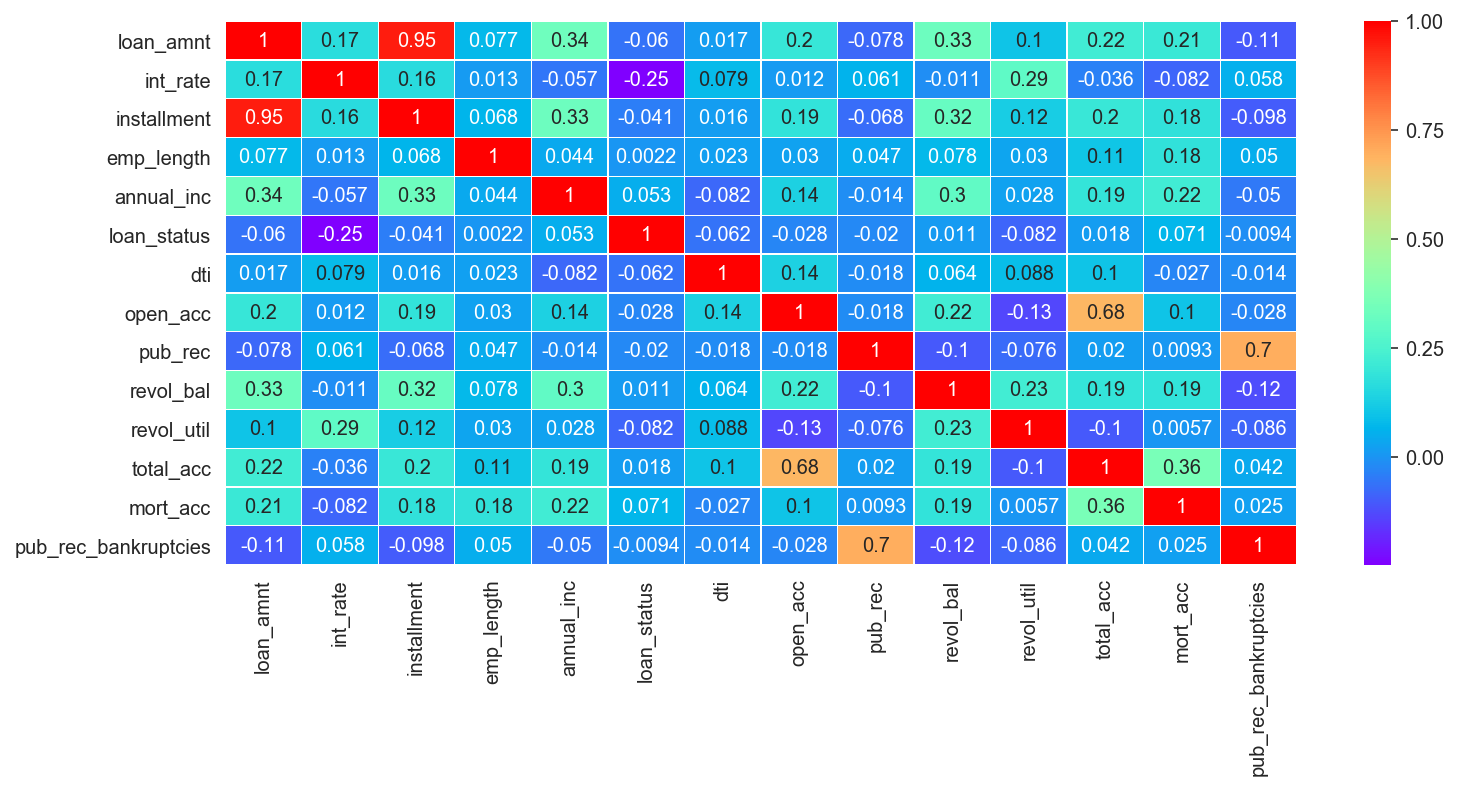

In [58]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),cmap='rainbow',linewidths=0.1,annot=True);

## Data Preprocessing

#### adding `zip_code`

In [59]:
def get_zipcode(col):
    zipcode = []
    for address in col:
        zipcode.append(address.split(' ')[-1])
    return(zipcode)

df['zip_code'] = get_zipcode(df['address'])
df = df.drop('address',axis=1)
dum_zip = pd.get_dummies(df['zip_code'])
df = pd.concat([df,dum_zip],axis=1)
df = df.drop('zip_code',axis=1)

#### dummy variables for `sub_grade`

In [60]:
# get dummies for sub_grade
dum_sub_grade = pd.get_dummies(df['sub_grade'])
df = pd.concat([df,dum_sub_grade],axis=1)
df = df.drop('sub_grade',axis=1)

#### extract only year from `earliest_cr_line`

In [61]:
# get only year from dates
def get_year(col):
    years = []
    for date in col:
        years.append(date.split('-')[-1])
    return(years)

df['earliest_cr_year'] = get_year(df['earliest_cr_line'])
df = df.drop('earliest_cr_line',axis=1)

In [62]:
# drop issue_d column
df = df.drop('issue_d',axis=1)

# drop state column
df = df.drop('state',axis=1)

# drop grade column
df = df.drop('grade',axis=1)

# drop earliest_cr_year
df = df.drop('earliest_cr_year',axis=1)

#### get dummies for `home_ownership`

In [63]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
dummies_ownership = pd.get_dummies(df['home_ownership'])
df = pd.concat([df,dummies_ownership],axis=1)
df = df.drop('home_ownership',axis=1)

#### dummies for `verification_status`

In [64]:
# convert verification_status to dummies
more_dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']])
df = pd.concat([df,more_dummies],axis=1)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)

#### Replace `term` entries with numbers

In [65]:
# replace with numbers
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

#### Turn `pub_rec` into categorical column and get dummies for `pub_rec`

In [66]:
rate = ['pubrec_none','pubrec_nce','pubrec_somewhat','pubrec_a_lot']

df['pub_rec'] = df['pub_rec'].replace([0],rate[0]).replace([1],rate[1]).replace([2,3,4,5],rate[2]).\
                replace([6,7,8,9,10,11,12,13,19,24,86,15,17,40],rate[3])

In [67]:
dum_pub_rec = pd.get_dummies(df['pub_rec'])
df = pd.concat([df,dum_pub_rec],axis=1)
df = df.drop('pub_rec',axis=1)

#### drop `total_acc` column

In [68]:
df = df.drop('total_acc',axis=1)

#### get dummies for `mort_acc`

In [69]:
none = [0]
few = [1,2,3]
a_lot = [4,5,6,7,8,9,10]
too_many = [11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,34]

df['mort_acc'] = df['mort_acc'].replace(none,'mort_none').replace(few,'mort_few').\
                 replace(a_lot,'mort_a_lot').replace(too_many,'mort_too_many')

In [70]:
dum_mort_acc = pd.get_dummies(df['mort_acc'])
df = pd.concat([df,dum_mort_acc],axis=1)
df = df.drop('mort_acc',axis=1)

#### Split Data

In [71]:
# get X and y
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#### Scaling Data

In [72]:
# initialize min&max scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
X_train.shape

(316824, 90)

#### Model Architecture

In [83]:
# create model
model = Sequential()

# hidden layers
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# loss function
model.compile(loss='binary_crossentropy',optimizer='adam')

In [85]:
# fit/train model
model.fit(X_train, y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Train on 316824 samples, validate on 79206 samples
Epoch 1/25
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2922 - val_loss: 0.2629
Epoch 2/25
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2634 - val_loss: 0.2628
Epoch 3/25
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2620 - val_loss: 0.2625
Epoch 4/25
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2609 - val_loss: 0.2614
Epoch 5/25
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2602 - val_loss: 0.2614
Epoch 6/25
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2596 - val_loss: 0.2618
Epoch 7/25
316824/316824 [==============================] - 3s 10us/sample - loss: 0.2594 - val_loss: 0.2612
Epoch 8/25
316824/316824 [==============================] - 3s 11us/sample - loss: 0.2590 - val_loss: 0.2614
Epoch 9/25
316824/316824 [==============================] - 3s 10us/sample - 

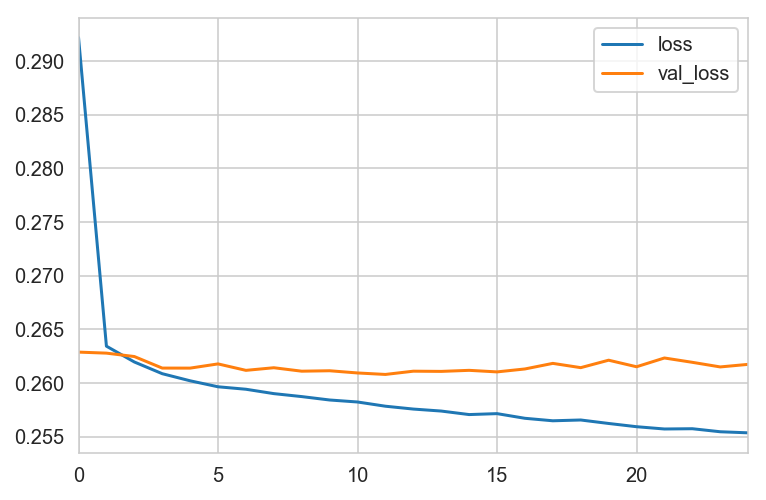

In [86]:
pd.DataFrame(model.history.history).plot()

In [87]:
prediction = model.predict_classes(X_test)

In [88]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15650
           1       0.88      1.00      0.93     63556

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



[[ 6967  8683]
 [  279 63277]]


## Test model

In [125]:
random.seed(12)
random_customer = random.randint(0,len(df))

new_customer = df.drop('loan_status',axis=1).iloc[random_customer]

In [126]:
# make prediction on new customer
model.predict_classes(new_customer.values.reshape(1,90))

array([[1]], dtype=int32)

In [127]:
# check:
df.iloc[random_customer]['loan_status']

1.0